In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score

#### Reading the File

In [2]:
data = pd.read_csv("Data1.csv")


In [20]:
data.head(5)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [21]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
having_IP_Address              2456 non-null int64
URL_Length                     2456 non-null int64
Shortining_Service             2456 non-null int64
having_At_Symbol               2456 non-null int64
double_slash_redirecting       2456 non-null int64
Prefix_Suffix                  2456 non-null int64
having_Sub_Domain              2456 non-null int64
SSLfinal_State                 2456 non-null int64
Domain_registeration_length    2456 non-null int64
Favicon                        2456 non-null int64
port                           2456 non-null int64
HTTPS_token                    2456 non-null int64
Request_URL                    2456 non-null int64
URL_of_Anchor                  2456 non-null int64
Links_in_tags                  2456 non-null int64
SFH                            2456 non-null int64
Submitting_to_email            2456 non-null int64
Abnormal_URL              

In [4]:
features = data.iloc[:,1:30]  
result = data['Result']

#### SPLIT THE DATA INTO TRAINING AND TESTING DATA WITH 33% OF DATA AS TEST DATA

In [5]:
from sklearn.model_selection import train_test_split
features_train,features_test,result_train,result_test=train_test_split(features,result,test_size=0.33,random_state=42)

In [6]:
print(len(features_train),len(features_test),len(result_train),len(result_test))

1645 811 1645 811


In [7]:
result_train.value_counts()

0    906
1    739
Name: Result, dtype: int64

## Feature Importance
#### Feature importance gives you a score for each feature of your data

In [8]:
data = pd.read_csv("Data1.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column 

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers



[0.00272732 0.00668758 0.00565713 0.00327734 0.00355547 0.17954229
 0.07039742 0.30565898 0.03922624 0.00992381 0.00643702 0.00677998
 0.0332745  0.2607254  0.03629052 0.00549204 0.00582523 0.00386584
 0.00405068 0.0106052 ]


/home/panda/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


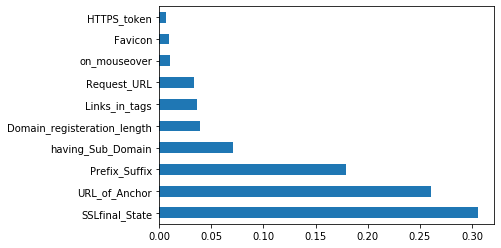

In [9]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Matrix with Heatmap

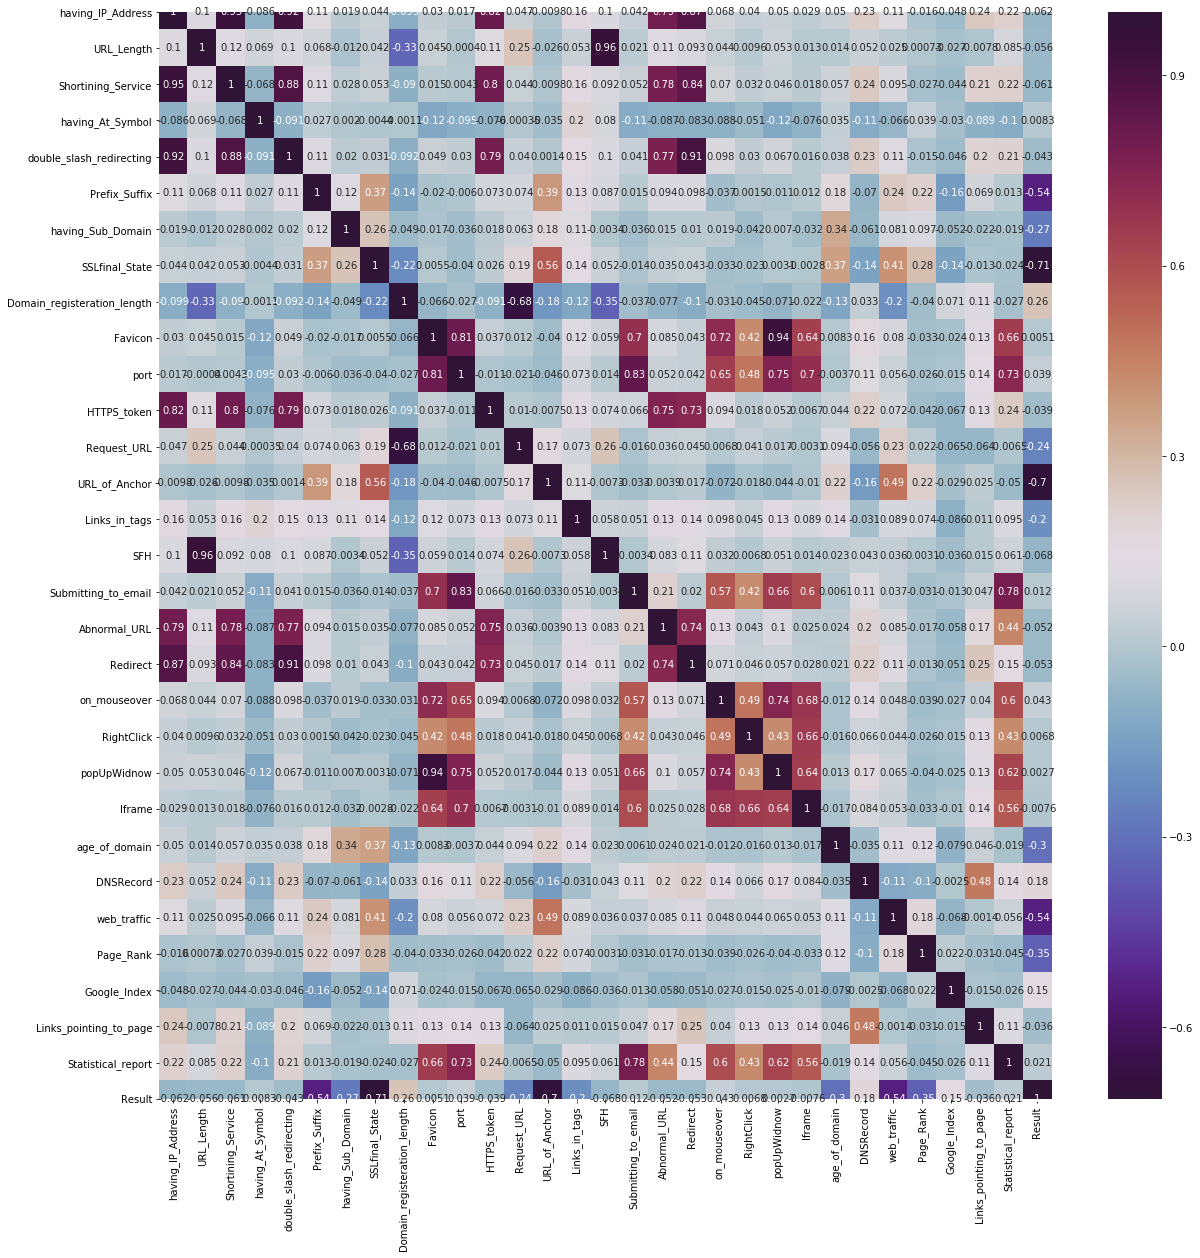

In [10]:
import seaborn as sns

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column 
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="twilight_shifted")

### Using DecisionTree_Classifier

#### Creating the model and fitting the data into the model


In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(features_train,result_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Predicting the result for test data

In [12]:
pred_label = model.predict(features_test)

#### creating confusion matrix and checking the accuracy

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(result_test,pred_label)
print(cm)
print("The accuracy is",accuracy_score(result_test,pred_label))

[[435  21]
 [ 12 343]]
The accuracy is 0.9593094944512947


### Using Gaussian Naive Bayes Classifier

In [14]:
#creating the classifier
clf_gnb = GaussianNB()  
#Fitting the training data  
clf_gnb.fit(features_train,result_train) 
# predictions on test data
result_pred=clf_gnb.predict(features_test)  
print(classification_report(result_test,result_pred))  
print("accuracy on training set is " + str(clf_gnb.score(features_train,result_train)))  
print("accuracy on testing set is " + str(clf_gnb.score(features_test,result_test))) 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       456
           1       0.93      0.93      0.93       355

    accuracy                           0.94       811
   macro avg       0.94      0.94      0.94       811
weighted avg       0.94      0.94      0.94       811

accuracy on training set is 0.9142857142857143
accuracy on testing set is 0.9395807644882861


### Using Random Forest Classifier

In [15]:

clf_rfc=RandomForestClassifier(n_estimators=10,criterion="entropy",max_features=5,random_state=42)
clf_rfc.fit(features_train,result_train)
result_pred=clf_rfc.predict(features_test)
print(classification_report(result_test,result_pred))
print("accuracy is " + str(clf_rfc.score(features_test,result_test))) 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       456
           1       0.97      0.96      0.96       355

    accuracy                           0.97       811
   macro avg       0.97      0.97      0.97       811
weighted avg       0.97      0.97      0.97       811

accuracy is 0.969173859432799


### Using Support Vector Machine Classifier

In [16]:
clf_svc=SVC(random_state=42)
clf_svc.fit(features_train,result_train)
result_pred=clf_svc.predict(features_test)
print(classification_report(result_test,result_pred))
print("accuracy on training set is " + str(clf_svc.score(features_train,result_train)))
print("accuracy on testing set " + str(clf_svc.score(features_test,result_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       456
           1       0.95      0.94      0.95       355

    accuracy                           0.95       811
   macro avg       0.95      0.95      0.95       811
weighted avg       0.95      0.95      0.95       811

accuracy on training set is 0.9556231003039514
accuracy on testing set 0.9531442663378545


/home/panda/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## PRINCIPLE COMPONENT ANALYSIS(PCA) ON TRAINING DATA

In [17]:
pca=PCA(n_components=15)  
pca.fit(features_train)
features_train_pca=pca.transform(features_train)
features_test_pca=pca.transform(features_test)

In [18]:
rfc_pca=RandomForestClassifier(criterion="entropy",random_state=42)
rfc_pca.fit(features_train_pca,result_train)
result_pred=rfc_pca.predict(features_test_pca)
print(classification_report(result_test,result_pred))
print("accuracy is " + str(rfc_pca.score(features_test_pca,result_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       456
           1       0.98      0.95      0.96       355

    accuracy                           0.97       811
   macro avg       0.97      0.96      0.97       811
weighted avg       0.97      0.97      0.97       811

accuracy is 0.966707768187423


/home/panda/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
svc_pca=SVC(random_state=42)
svc_pca.fit(features_train_pca,result_train)
result_pred=svc_pca.predict(features_test_pca)
print(classification_report(result_test,result_pred))
print("accuracy is " + str(svc_pca.score(features_test_pca,result_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       456
           1       0.96      0.96      0.96       355

    accuracy                           0.96       811
   macro avg       0.96      0.96      0.96       811
weighted avg       0.96      0.96      0.96       811

accuracy is 0.9642416769420469


/home/panda/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
